### Step 1: Value of k

In [39]:
import numpy as np
data = np.genfromtxt('/content/data.csv',delimiter=',')
n = data.shape[0] # shape[0] = 1200 sample or rows

In [40]:
k=6 # k: Hyperparameter or Number of centers or clusters

### Step 2: Center selection
Randomly select k points from the dataset

In [41]:
center_idx = np.random.choice(n,k,replace=False)
# center index = choose randomly (from 1200 samples, select 6 as centers,do not take the same center index twice)
print(center_idx)
centers = list()

[ 807  510  411  938  708 1191]


In [42]:
data[0] # array([0.20987452, 2.00290685])
data[0].tolist() # [0.209874517209939, 2.002906846795961]

[0.209874517209939, 2.002906846795961]

In [43]:
# Going through all the center index and adding their values to centers list
# Inefficient approach, below is an efficient approach
for i in center_idx:
  centers.append(data[i].tolist())
centers

[[12.880763006645207, 11.809273229659514],
 [7.280860594070502, 1.263410771988171],
 [8.05950654658686, 1.1622426174832587],
 [11.161164618213308, 13.118215602617498],
 [1.6505935061163262, 6.7301532228075365],
 [13.627852089219106, 3.360106496954886]]

In [44]:
# Efficient Approach
centers = data[np.random.choice(n,k,replace=False)]

### Step 3:
Distance of all cluster from sample and assign that point to cluster where distance is min

In [45]:
def calc_distance(a,b):
  dist = 0;
  for x1,x2 in zip(a,b):
    dist += (x1-x2)**2
  return dist**0.5

# Inefficient approach: Two for loop means higher time complexity
for s in data: # looping through all 1200 samples or rows
  idx = -1
  min = 999
  for i,c in enumerate(centers):
    dst = calc_distance(s,c)
    # distance = calculate euclidean distance between (sample and center)
    if dst < min: # if distance is less than the minimum distance replace
      min = dst # minimum distance and its index
      idx = i

In [46]:
data[0] # output: array([0.20987452, 2.00290685])
centers[0] # output: array([0.70647349, 6.11825379])
data[0]-centers[0] # output: array([-12.24221648, -10.97773423])
(data[0]-centers[0])**2 # output: array([149.87186425, 120.51064878])
((data[0]-centers[0])**2).sum() # output: 270.38251303167374
((data[0]-centers[0])**2).sum()**0.5 # output: 16.4433121
((data[0]-centers[1])**2).sum()**0.5 # output: 4.29497672

3.9864269350918597

In [47]:
distance = np.zeros((n,k))
for i in range(k):
  # distance[all rows,ith column]
  # data - centers[i]: row wise substraction
  distance[:,i] = ((data-centers[i])**2).sum(axis=1)**0.5

In [48]:
# axis = 1 : operation is applied accross row
# closet = index of the minimum value (row wise minimum distance)
closest = np.argmin(distance,axis=1)

### Step 4: Finding new centers

In [49]:
for i in range(k):
  # centers[0->5] = getting the value from index and finding it's column wise average value
  centers[i] = data[closest==i].mean(axis=0)

In [50]:
centers

array([[ 3.01361692,  6.30992611],
       [ 0.93961105,  0.92613735],
       [ 7.89193093,  0.79331815],
       [13.36509408,  5.36231171],
       [12.95924491, 13.08169599],
       [11.92942513,  4.1791584 ]])

In [51]:
# preserving the value of closet in different memory
old_closest = closest.copy()

###Step 5: Check the pseudocode
if all values of old_closet is equal to the current closet, then break the loop

In [52]:
# if all values of old_closet is equal to the current closet, then break the loop
if all(old_closest==closest):
  break

SyntaxError: ignored

In [53]:
#you have to write a function kmeans()
def kmeans(X,k):
  pass

In [56]:
from matplotlib import pyplot as plt
# from library import module as alias

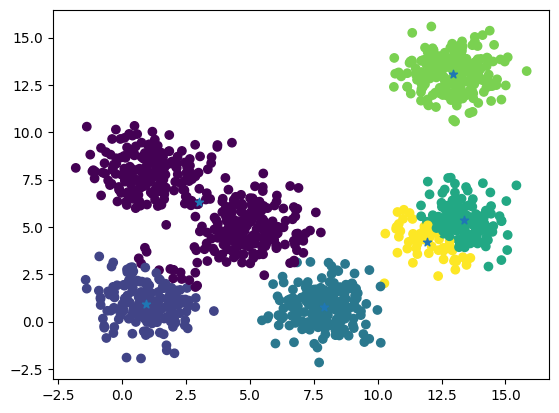

In [55]:
# plt.scatter(X co-ordinate, Y co-ordinate, color is determined by closet or clusters)
plt.scatter(data[:,0],data[:,1],c=closest)
plt.scatter(centers[:,0],centers[:,1],marker='*')
plt.show()